In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df = pd.read_csv('two_class_gaussian.csv')
train_df, valid_df = train_test_split(df, test_size=0.3, random_state=42)
train_df.to_csv('train_data.csv', index=False)
valid_df.to_csv('valid_data.csv', index=False)

In [10]:
df = pd.read_csv('two_class_uniform.csv')
trainU_df, validU_df = train_test_split(df, test_size=0.2, random_state=42)
trainU_df.to_csv('train_dataU.csv', index=False)
validU_df.to_csv('valid_dataU.csv', index=False)

In [11]:
import numpy as np
import pandas as pd
import configparser

def load_configuration(config_path):
    config = configparser.ConfigParser()
    config.read(config_path)
    return {
        'inputs': config.getint('Network', 'Inputs'),
        'outputs': config.getint('Network', 'Outputs'),
        'connectivity': config.get('Network', 'Connectivity'),
        'learning_rate': config.getfloat('Network', 'LearningRate'),
        'epochs': config.getint('Network', 'Epochs'),
        'training_data_path': config.get('Data', 'TrainingDataPath'),
        'testing_data_path': config.get('Data', 'TestingDataPath')
    }
    return network_config

Epoch 0: Error = [0.27714286]
Epoch 1: Error = [0.03714286]
Epoch 2: Error = [0.01428571]
Epoch 3: Error = [0.01142857]
Epoch 4: Error = [0.01428571]
Epoch 5: Error = [0.01428571]
Epoch 6: Error = [0.01714286]
Epoch 7: Error = [0.01428571]
Epoch 8: Error = [0.01142857]
Epoch 9: Error = [0.01428571]
Epoch 10: Error = [0.01142857]
Epoch 11: Error = [0.01428571]
Epoch 12: Error = [0.01428571]
Epoch 13: Error = [0.01142857]
Epoch 14: Error = [0.01428571]
Epoch 15: Error = [0.01142857]
Epoch 16: Error = [0.01428571]
Epoch 17: Error = [0.01428571]
Epoch 18: Error = [0.01142857]
Epoch 19: Error = [0.01428571]
Epoch 20: Error = [0.02285714]
Epoch 21: Error = [0.02]
Epoch 22: Error = [0.02]
Epoch 23: Error = [0.02571429]
Epoch 24: Error = [0.02285714]
Epoch 25: Error = [0.02]
Epoch 26: Error = [0.02571429]
Epoch 27: Error = [0.02285714]
Epoch 28: Error = [0.02857143]
Epoch 29: Error = [0.02285714]
Epoch 30: Error = [0.02857143]
Epoch 31: Error = [0.02857143]
Epoch 32: Error = [0.02857143]
Epoch

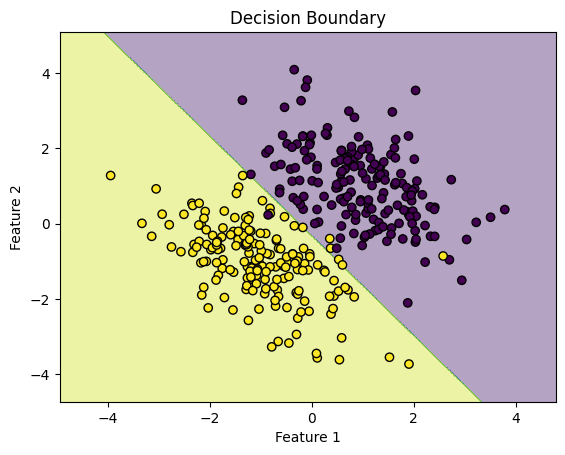

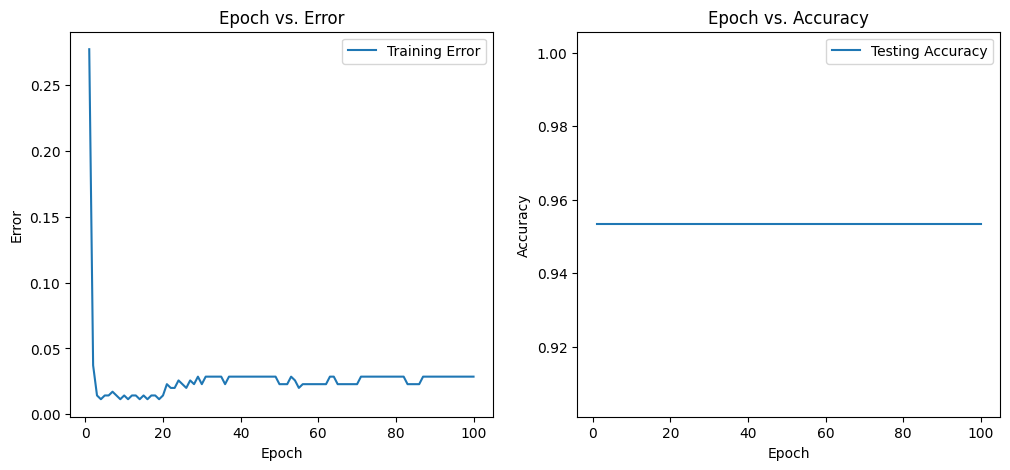

In [13]:
#Testing the Gaussian Dataset
def initialize_network(num_inputs, num_outputs, connectivity):
    if connectivity == 'fully':
        return np.random.uniform(-1, 1, (num_outputs, num_inputs + 1))
    else:
        raise NotImplementedError("This example supports fully connected networks only.")

def activation_function(x):
       return np.where(x >= 0, 1, 0)

def train_network(weights, training_data, learning_rate, epochs):
    inputs = training_data[:, :-1]
    inputs = np.hstack((inputs, np.ones((inputs.shape[0], 1))))
    targets = training_data[:, -1].reshape(-1, 1)
    errors = []

    for epoch in range(epochs):
        total_error = 0
        for input_vector, target in zip(inputs, targets):
            input_vector = input_vector.reshape(1, -1)
            output = activation_function(np.dot(input_vector, weights.T))
            error = target - output
            total_error += np.abs(error)
            weights += learning_rate * error.T * input_vector
        errors.append(total_error[0] / inputs.shape[0])
        print(f"Epoch {epoch}: Error = {errors[-1]}")

    return weights, errors

def test_network(weights, testing_data):
    inputs = testing_data[:, :-1]
    inputs = np.hstack((inputs, np.ones((inputs.shape[0], 1))))
    targets = testing_data[:, -1]
    outputs = activation_function(np.dot(inputs, weights.T))
    accuracy = np.mean(outputs.flatten() == targets)
    print(f"Testing Accuracy: {accuracy * 100:.2f}%")
    return accuracy

def plot_decision_boundary(weights, training_data):
    X = training_data[:, :-1]
    y = training_data[:, -1]

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))
    grid = np.c_[xx1.ravel(), xx2.ravel(), np.ones_like(xx1).ravel()]
    Z = activation_function(np.dot(grid, weights.T))
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

def plot_metrics(errors, accuracy):
    epochs = range(1, len(errors) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, errors, label='Training Error')
    plt.title('Epoch vs. Error')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, [accuracy] * len(epochs), label='Testing Accuracy')
    plt.title('Epoch vs. Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

def load_data(path):
    return pd.read_csv(path).values


def run(config_path):
    config = load_configuration(config_path)
    training_data = load_data(config['training_data_path'])
    testing_data = load_data(config['testing_data_path'])
    weights = initialize_network(config['inputs'], config['outputs'], config['connectivity'])
    weights, errors = train_network(weights, training_data, config['learning_rate'], config['epochs'])
    accuracy = test_network(weights, testing_data)
    plot_decision_boundary(weights, training_data)
    plot_metrics(errors, accuracy)

if __name__ == "__main__":
    run("perceptron_config.ini")

Epoch 0: Error = [0.6225]
Epoch 1: Error = [0.1975]
Epoch 2: Error = [0.0225]
Epoch 3: Error = [0.]
Epoch 4: Error = [0.]
Epoch 5: Error = [0.]
Epoch 6: Error = [0.]
Epoch 7: Error = [0.]
Epoch 8: Error = [0.]
Epoch 9: Error = [0.]
Epoch 10: Error = [0.]
Epoch 11: Error = [0.]
Epoch 12: Error = [0.]
Epoch 13: Error = [0.]
Epoch 14: Error = [0.]
Epoch 15: Error = [0.]
Epoch 16: Error = [0.]
Epoch 17: Error = [0.]
Epoch 18: Error = [0.]
Epoch 19: Error = [0.]
Epoch 20: Error = [0.]
Epoch 21: Error = [0.]
Epoch 22: Error = [0.]
Epoch 23: Error = [0.]
Epoch 24: Error = [0.]
Epoch 25: Error = [0.]
Epoch 26: Error = [0.]
Epoch 27: Error = [0.]
Epoch 28: Error = [0.]
Epoch 29: Error = [0.]
Epoch 30: Error = [0.]
Epoch 31: Error = [0.]
Epoch 32: Error = [0.]
Epoch 33: Error = [0.]
Epoch 34: Error = [0.]
Epoch 35: Error = [0.]
Epoch 36: Error = [0.]
Epoch 37: Error = [0.]
Epoch 38: Error = [0.]
Epoch 39: Error = [0.]
Epoch 40: Error = [0.]
Epoch 41: Error = [0.]
Epoch 42: Error = [0.]
Epoch 43:

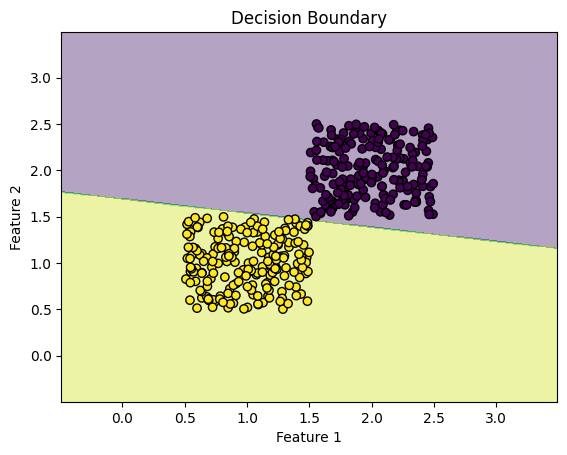

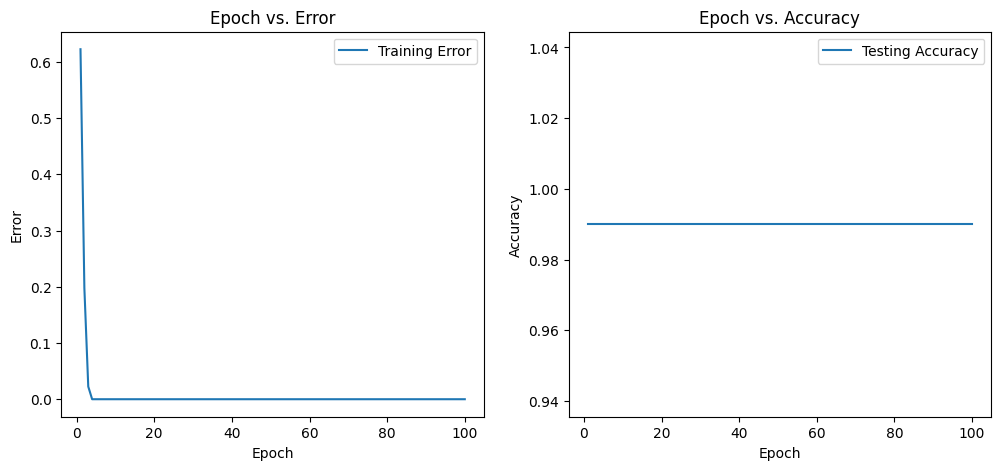

In [14]:
#Testing the Uniform Dataset
def initialize_network(num_inputs, num_outputs, connectivity):
    if connectivity == 'fully':
        return np.random.uniform(-1, 1, (num_outputs, num_inputs + 1))
    else:
        raise NotImplementedError("This example supports fully connected networks only.")

def activation_function(x):
       return np.where(x >= 0, 1, 0)

def train_network(weights, training_data, learning_rate, epochs):
    inputs = training_data[:, :-1]
    inputs = np.hstack((inputs, np.ones((inputs.shape[0], 1))))
    targets = training_data[:, -1].reshape(-1, 1)
    errors = []

    for epoch in range(epochs):
        total_error = 0
        for input_vector, target in zip(inputs, targets):
            input_vector = input_vector.reshape(1, -1)
            output = activation_function(np.dot(input_vector, weights.T))
            error = target - output
            total_error += np.abs(error)
            weights += learning_rate * error.T * input_vector
        errors.append(total_error[0] / inputs.shape[0])
        print(f"Epoch {epoch}: Error = {errors[-1]}")

    return weights, errors

def test_network(weights, testing_data):
    inputs = testing_data[:, :-1]
    inputs = np.hstack((inputs, np.ones((inputs.shape[0], 1))))
    targets = testing_data[:, -1]
    outputs = activation_function(np.dot(inputs, weights.T))
    accuracy = np.mean(outputs.flatten() == targets)
    print(f"Testing Accuracy: {accuracy * 100:.2f}%")
    return accuracy

def plot_decision_boundary(weights, training_data):
    X = training_data[:, :-1]
    y = training_data[:, -1]

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))
    grid = np.c_[xx1.ravel(), xx2.ravel(), np.ones_like(xx1).ravel()]
    Z = activation_function(np.dot(grid, weights.T))
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

def plot_metrics(errors, accuracy):
    epochs = range(1, len(errors) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, errors, label='Training Error')
    plt.title('Epoch vs. Error')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, [accuracy] * len(epochs), label='Testing Accuracy')
    plt.title('Epoch vs. Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()


def run(config_path):
    config = load_configuration(config_path)
    training_data = load_data(config['training_data_path'])
    testing_data = load_data(config['testing_data_path'])

    weights = initialize_network(config['inputs'], config['outputs'], config['connectivity'])
    weights, errors = train_network(weights, training_data, config['learning_rate'], config['epochs'])
    accuracy = test_network(weights, testing_data)
    plot_decision_boundary(weights, training_data)
    plot_metrics(errors, accuracy)

if __name__ == "__main__":
    run("perceptronU_config.ini")

Epoch 0: Error = [0.43969943]
Epoch 1: Error = [0.39807148]
Epoch 2: Error = [0.36999581]
Epoch 3: Error = [0.34513384]
Epoch 4: Error = [0.32315446]
Epoch 5: Error = [0.30371812]
Epoch 6: Error = [0.28649426]
Epoch 7: Error = [0.27118164]
Epoch 8: Error = [0.25751549]
Epoch 9: Error = [0.24526783]
Epoch 10: Error = [0.23424451]
Epoch 11: Error = [0.22428111]
Epoch 12: Error = [0.21523859]
Epoch 13: Error = [0.20699937]
Epoch 14: Error = [0.19946382]
Epoch 15: Error = [0.19254723]
Epoch 16: Error = [0.18617739]
Epoch 17: Error = [0.18029247]
Epoch 18: Error = [0.17483931]
Epoch 19: Error = [0.16977206]
Epoch 20: Error = [0.16505097]
Epoch 21: Error = [0.16064149]
Epoch 22: Error = [0.15651341]
Epoch 23: Error = [0.15264028]
Epoch 24: Error = [0.14899881]
Epoch 25: Error = [0.14556844]
Epoch 26: Error = [0.14233096]
Epoch 27: Error = [0.13927018]
Epoch 28: Error = [0.13637167]
Epoch 29: Error = [0.13362253]
Epoch 30: Error = [0.13101118]
Epoch 31: Error = [0.12852722]
Epoch 32: Error = 

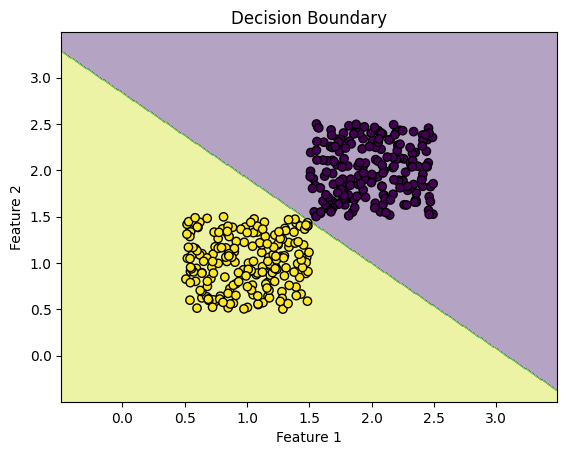

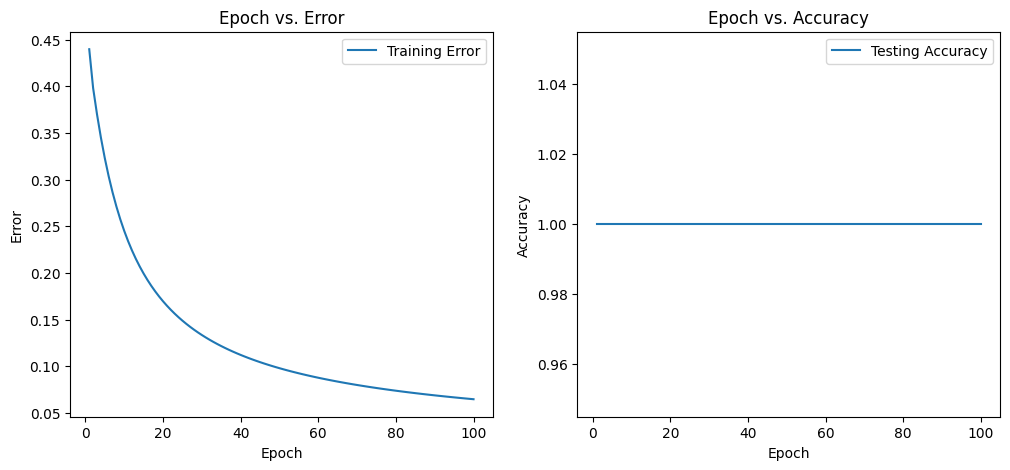

In [15]:
#Testing the Uniform Dataset using a sigmoid activation function
def initialize_network(num_inputs, num_outputs, connectivity):
    if connectivity == 'fully':
        return np.random.uniform(-1, 1, (num_outputs, num_inputs + 1))
    else:
        raise NotImplementedError("This example supports fully connected networks only.")

def activation_function(x):
    return 1 / (1 + np.exp(-x))

def train_network(weights, training_data, learning_rate, epochs):
    inputs = training_data[:, :-1]
    inputs = np.hstack((inputs, np.ones((inputs.shape[0], 1))))
    targets = training_data[:, -1].reshape(-1, 1)
    errors = []

    for epoch in range(epochs):
        total_error = 0
        for input_vector, target in zip(inputs, targets):
            input_vector = input_vector.reshape(1, -1)
            output = activation_function(np.dot(input_vector, weights.T))
            error = target - output
            total_error += np.abs(error)
            weights += learning_rate * error.T * input_vector
        errors.append(total_error[0] / inputs.shape[0])
        print(f"Epoch {epoch}: Error = {errors[-1]}")

    return weights, errors

def test_network(weights, testing_data):
    inputs = testing_data[:, :-1]
    inputs = np.hstack((inputs, np.ones((inputs.shape[0], 1))))
    targets = testing_data[:, -1]
    outputs = activation_function(np.dot(inputs, weights.T))
    predictions = (outputs >= 0.5).astype(int)
    accuracy = np.mean(predictions.flatten() == targets)
    print(f"Testing Accuracy: {accuracy * 100:.2f}%")
    return accuracy


def plot_decision_boundary(weights, training_data):
    X = training_data[:, :-1]
    y = training_data[:, -1]

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))
    grid = np.c_[xx1.ravel(), xx2.ravel(), np.ones_like(xx1).ravel()]
    Z = activation_function(np.dot(grid, weights.T))
    Z = (Z >= 0.5).astype(int)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


def plot_metrics(errors, accuracy):
    epochs = range(1, len(errors) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, errors, label='Training Error')
    plt.title('Epoch vs. Error')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, [accuracy] * len(epochs), label='Testing Accuracy')
    plt.title('Epoch vs. Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()


def run(config_path):
    config = load_configuration(config_path)
    training_data = load_data(config['training_data_path'])
    testing_data = load_data(config['testing_data_path'])

    weights = initialize_network(config['inputs'], config['outputs'], config['connectivity'])
    weights, errors = train_network(weights, training_data, config['learning_rate'], config['epochs'])
    accuracy = test_network(weights, testing_data)
    plot_decision_boundary(weights, training_data)
    plot_metrics(errors, accuracy)

if __name__ == "__main__":
    run("perceptronU_config.ini")

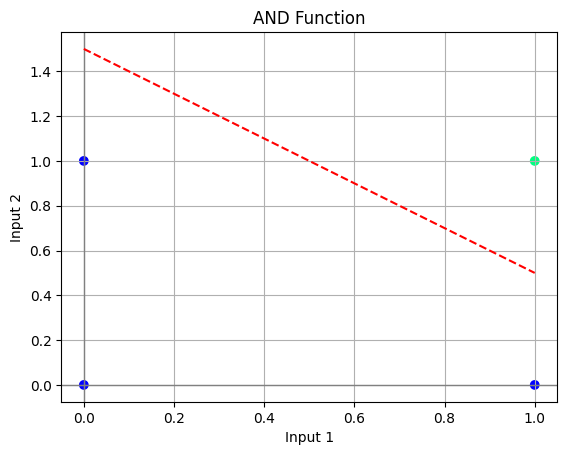

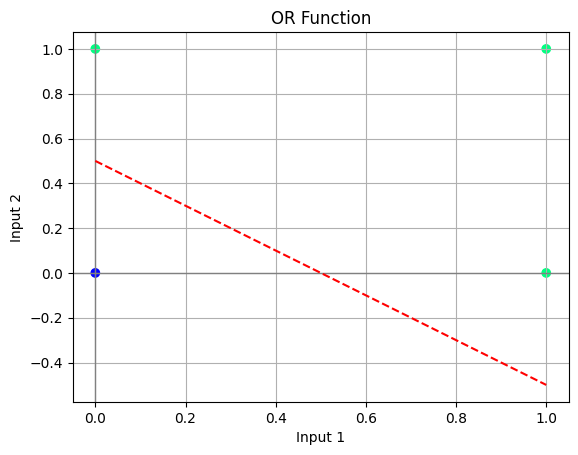

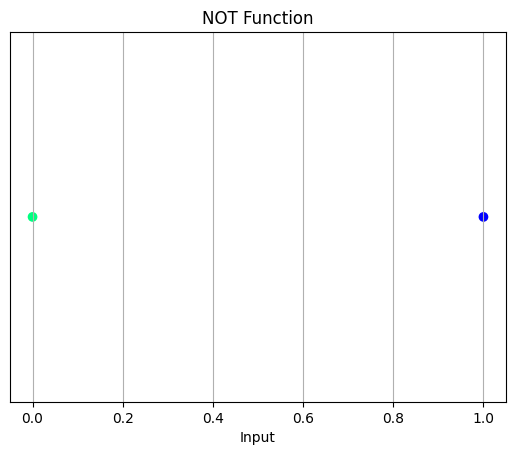

In [16]:
def perceptron(weights, bias, inputs):
    summation = np.dot(weights, inputs) + bias
    return 1 if summation > 0 else 0

# Weights and bias for AND, OR, and NOT functions
and_weights = np.array([1, 1])
or_weights = np.array([1, 1])
not_weights = np.array([-1])
bias_and = -1.5
bias_or = -0.5
bias_not = 0.5

# Plotting decision boundaries for AND and OR
def plot_decision_boundary(weights, bias, outputs, title):
    plt.figure()
    plt.axvline(x=0, color='grey', lw=1)
    plt.axhline(y=0, color='grey', lw=1)

    slope = -weights[0] / weights[1]
    intercept = -bias / weights[1]

    x_vals = np.array(plt.gca().get_xlim())
    y_vals = intercept + slope * x_vals

    plt.plot(x_vals, y_vals, '--', c='red')
    plt.scatter(inputs[:, 0], inputs[:, 1], c=outputs, cmap='winter')
    plt.title(title)
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.grid(True)

# Inputs and outputs calculation
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs_and = [perceptron(and_weights, bias_and, x) for x in inputs]
outputs_or = [perceptron(or_weights, bias_or, x) for x in inputs]

inputs_not = np.array([0, 1])
outputs_not = [perceptron(not_weights, bias_not, np.array([x])) for x in inputs_not]

# Plotting
plot_decision_boundary(and_weights, bias_and, outputs_and, "AND Function")
plot_decision_boundary(or_weights, bias_or, outputs_or, "OR Function")

plt.figure()
plt.scatter(inputs_not, [0, 0], c=outputs_not, cmap='winter')
plt.title("NOT Function")
plt.xlabel('Input')
plt.yticks([])
plt.grid(True)

plt.show()


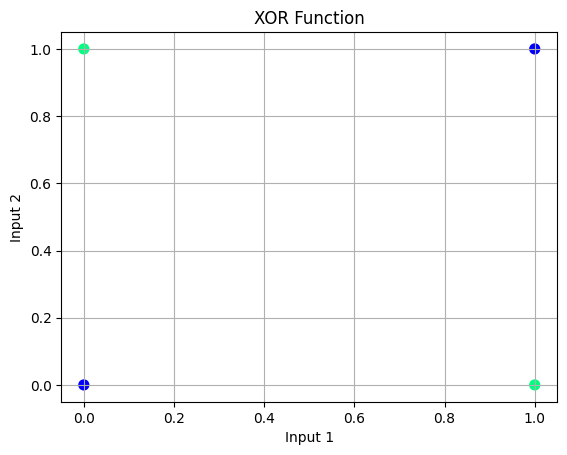

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define inputs and XOR outputs
inputs_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs_xor = np.array([0, 1, 1, 0])  # XOR outputs

# Plotting XOR - Demonstrating the non-linear separability
plt.figure()
plt.scatter(inputs_xor[:, 0], inputs_xor[:, 1], c=outputs_xor, cmap='winter', s=50)
plt.title("XOR Function")
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.grid(True)



plt.show()
